In [16]:
import pandas as pd
#import seaborn as sns
import numpy as np
#import scipy.stats as st
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
#import matplotlib as mpl
import librosa

In [3]:
y, sr = librosa.load("train\\0a1f7e9733c1896cef712f25a3518bcf.wav")

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

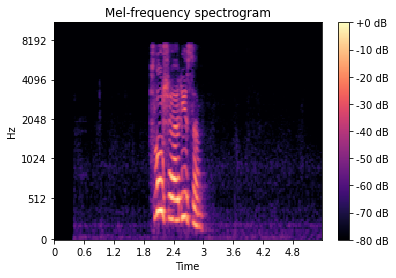

<Figure size 2304x864 with 0 Axes>

In [4]:
import librosa.display
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr, ax=ax)
plt.figure(figsize = (32,12)) 
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [5]:
S.shape

(128, 232)

In [6]:
mel = np.mean(S,axis=1)
mel

array([1.68970902e-03, 2.76776613e-03, 1.05293584e-03, 1.32114440e-03,
       4.71712276e-03, 8.03571716e-02, 6.97997212e-01, 7.52854049e-01,
       3.81553710e-01, 2.19047189e+00, 3.45372224e+00, 4.67581129e+00,
       1.19007826e+00, 7.68906736e+00, 1.66836605e+01, 1.27324510e+00,
       3.88196826e-01, 1.16492108e-01, 1.02452624e+00, 6.40991163e+00,
       4.05512333e+00, 1.48353493e+00, 3.71123016e-01, 1.70250043e-01,
       7.48068988e-02, 1.66123852e-01, 3.12186152e-01, 9.39025342e-01,
       4.03493357e+00, 8.91752529e+00, 2.82466865e+00, 8.23168039e-01,
       3.15486789e-01, 6.43437877e-02, 3.92041691e-02, 4.51660603e-02,
       4.10971679e-02, 5.71098067e-02, 2.22685203e-01, 6.66850865e-01,
       1.69642508e-01, 1.81919903e-01, 2.32654437e-01, 3.26480746e-01,
       9.02161077e-02, 4.61528860e-02, 3.50105129e-02, 5.89420274e-02,
       2.54798196e-02, 6.22988725e-03, 6.30860915e-03, 7.20557151e-03,
       5.29959612e-03, 1.54018505e-02, 6.62869960e-02, 3.96775566e-02,
      

In [7]:
mel.shape

(128,)

In [8]:
mel

array([1.68970902e-03, 2.76776613e-03, 1.05293584e-03, 1.32114440e-03,
       4.71712276e-03, 8.03571716e-02, 6.97997212e-01, 7.52854049e-01,
       3.81553710e-01, 2.19047189e+00, 3.45372224e+00, 4.67581129e+00,
       1.19007826e+00, 7.68906736e+00, 1.66836605e+01, 1.27324510e+00,
       3.88196826e-01, 1.16492108e-01, 1.02452624e+00, 6.40991163e+00,
       4.05512333e+00, 1.48353493e+00, 3.71123016e-01, 1.70250043e-01,
       7.48068988e-02, 1.66123852e-01, 3.12186152e-01, 9.39025342e-01,
       4.03493357e+00, 8.91752529e+00, 2.82466865e+00, 8.23168039e-01,
       3.15486789e-01, 6.43437877e-02, 3.92041691e-02, 4.51660603e-02,
       4.10971679e-02, 5.71098067e-02, 2.22685203e-01, 6.66850865e-01,
       1.69642508e-01, 1.81919903e-01, 2.32654437e-01, 3.26480746e-01,
       9.02161077e-02, 4.61528860e-02, 3.50105129e-02, 5.89420274e-02,
       2.54798196e-02, 6.22988725e-03, 6.30860915e-03, 7.20557151e-03,
       5.29959612e-03, 1.54018505e-02, 6.62869960e-02, 3.96775566e-02,
      

In [9]:
df = pd.read_table('targets.tsv',names=['file','gender'])
df['file'] = pd.Series(map(lambda x:x+'.wav',df['file']))
df


,file,gender
0,5d1f7e43366513a1d0a6ec5640c3dc24.wav,1
1,9a701a4536a05b6610a590a9fe702ed8.wav,1
2,cad0b8547008d1524c1a0e5fd51f9908.wav,1
3,4bbe607e7dc95460e2cc1a6ee5f4dfa6.wav,0
4,30fb32cba90b34af26f3f14f5d636805.wav,0
...,...,...
13931,215443bcce2003d58d7dc6cd53af73ed.wav,1
13932,d26e5ebee3589530a4ec735ba1baab83.wav,0
13933,b9ae9428d4d7d279068aea06365d5736.wav,1
13934,3da22010bcdd5b47d7f2d3ceea190195.wav,0


In [10]:
target = dict(zip(df['file'],df['gender']))
target

{'5d1f7e43366513a1d0a6ec5640c3dc24.wav': 1,
 '9a701a4536a05b6610a590a9fe702ed8.wav': 1,
 'cad0b8547008d1524c1a0e5fd51f9908.wav': 1,
 '4bbe607e7dc95460e2cc1a6ee5f4dfa6.wav': 0,
 '30fb32cba90b34af26f3f14f5d636805.wav': 0,
 'fa33445afe71a6dc18e4881c053da5be.wav': 0,
 '2f1a399df5f41cf3730253d07d7756ae.wav': 0,
 'cfb6bb7aa22ae864c2f3e08047b2cd3a.wav': 0,
 '8de1d8568032a2c5fa8301313b5487bc.wav': 1,
 '072aec7c0d3ed87387a310fd7c88f9a4.wav': 0,
 '9ac84ceb21b973a97a42a0a2871da2a4.wav': 1,
 '5c8ad64dd55b682d0e7e10e57d3bdaff.wav': 1,
 '11622347865947d971e527e3d971f2f9.wav': 1,
 '3ac8078b6e2ca534ddc1062d94f7cfcf.wav': 0,
 '4d261acb44afb98432f66578aea1bf1f.wav': 0,
 '37961a381e9df505afdc1bd2c3483e1c.wav': 0,
 '08a0aedcf23f974821c45584dc21d87e.wav': 0,
 '466c0650924bda57206d6ca075b1b4ea.wav': 0,
 'cbab9d2664d77a32093ecc21f44bf893.wav': 1,
 'c39fd30a3ec8d5de205880fd6461dc78.wav': 1,
 '6cf7304f4583eb61fd5b9ed43193bf6d.wav': 0,
 'e7550c48fbb1ee35b0de05c0248dc30e.wav': 0,
 'c135e2d9601e8daf705458b9eabc8f

In [12]:
# X = pd.DataFrame()
# for file in df['file']:
#     y, sr = librosa.load('train/'+file)
#     S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=8)
#     mel = np.mean(S,axis=1)
#     X = X.append(pd.Series(mel,name=file))

In [ ]:
#X.to_csv('features.csv')

X = pd.read_csv('features.csv',index_col=0)

In [13]:
df = df.join(X,on='file')

,file,gender,0,1,2,3,4,5,6,7
0,5d1f7e43366513a1d0a6ec5640c3dc24.wav,1,0.480418,0.168439,0.011748,0.017965,0.019169,0.004488,0.001441,0.000189
1,9a701a4536a05b6610a590a9fe702ed8.wav,1,0.598223,0.077986,0.002136,0.001755,0.002495,0.001514,0.000956,0.000570
2,cad0b8547008d1524c1a0e5fd51f9908.wav,1,2.293589,1.136460,0.074822,0.059199,0.039333,0.004926,0.002137,0.000973
3,4bbe607e7dc95460e2cc1a6ee5f4dfa6.wav,0,4.432639,1.855199,0.206601,0.231915,0.085142,0.057310,0.032647,0.006312
4,30fb32cba90b34af26f3f14f5d636805.wav,0,0.463178,0.146208,0.007433,0.022418,0.005937,0.002249,0.001159,0.000231
...,...,...,...,...,...,...,...,...,...,...
13931,215443bcce2003d58d7dc6cd53af73ed.wav,1,0.441967,0.166065,0.017090,0.007659,0.005749,0.011375,0.004418,0.000546
13932,d26e5ebee3589530a4ec735ba1baab83.wav,0,1.880630,0.832918,0.042692,0.031134,0.013797,0.003491,0.005144,0.000572
13933,b9ae9428d4d7d279068aea06365d5736.wav,1,0.567213,1.129127,0.067744,0.073531,0.020086,0.008148,0.007738,0.003437
13934,3da22010bcdd5b47d7f2d3ceea190195.wav,0,0.422946,0.043064,0.002255,0.004444,0.003273,0.001674,0.001438,0.000870


In [ ]:
X =train_test_split(df)

In [ ]:
clf = RandomForestClassifier()
cv = GridSearchCV(clf,{'n_estimators':range(2,100,5)})
cv.fit(X_train,y_train)